In [107]:
import cv2
import numpy as np
import easygui
import matplotlib.pyplot as plt
from PIL import Image
import re
from re import search
from pytesseract import pytesseract

In [108]:
#Get user to input path
image_path = easygui.fileopenbox()
image = cv2.imread(image_path)

In [109]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

denoise = cv2.fastNlMeansDenoising(gray, None, 50, 7, 21) 

blurred = cv2.GaussianBlur(denoise, (5, 5), 0)

hist = cv2.equalizeHist(blurred)

thresh = cv2.adaptiveThreshold(hist, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 10)

kernel = np.ones((1, 1), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 1)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations = 1)

text = pytesseract.image_to_string(opening, config="--psm 6")


In [110]:
matchedSerial = search('[a-zA-Z]{2}\d{10}', text)

if matchedSerial is not None:
    serialNumber = matchedSerial.group(0)
    
    #Gets 2nd element of serial number (control code)
    controlCode = serialNumber[1]
    #Get string ascii value of control code
    ascii = str(ord(controlCode))
    
    #Get 1st element of serial number (country code)
    firstLetter = serialNumber[0]

    #Assign country number based on Eurozone values, could've used a dictionary but this was quicker :)
    if firstLetter == 'D':
        countryCode = 4
        countryOfIssue = "Estonia"

    elif firstLetter == 'E':
        countryCode = 3
        countryOfIssue = "Slovakia"

    elif firstLetter == 'F':
        countryCode = 2
        countryOfIssue = "Malta"

    elif firstLetter == 'G':
        countryCode = 1
        countryOfIssue = "Cyprus"

    elif firstLetter == 'H':
        countryCode = 9
        countryOfIssue = "Slovenia"

    elif firstLetter == 'J':
        countryCode = 7
        countryOfIssue = "United Kingdom"

    elif firstLetter == 'K':
        countryCode = 6
        countryOfIssue = "Sweden"

    elif firstLetter == 'L':
        countryCode = 5
        countryOfIssue = "Finland"

    elif firstLetter == 'M':
        countryCode = 4
        countryOfIssue = "Portugal"

    elif firstLetter == 'N':
        countryCode = 3
        countryOfIssue = "Austria"

    elif firstLetter == 'P':
        countryCode = 1
        countryOfIssue = "Netherlands"

    elif firstLetter == 'R':
        countryCode = 8
        countryOfIssue = "Luxembourg"

    elif firstLetter == 'S':
        countryCode = 7
        countryOfIssue = "Italy"

    elif firstLetter == 'T':
        countryCode = 6
        countryOfIssue = "Ireland"

    elif firstLetter == 'U':
        countryCode = 5
        countryOfIssue = "France"

    elif firstLetter == 'V':
        countryCode = 4
        countryOfIssue = "Spain"

    elif firstLetter == 'W':
        countryCode = 3
        countryOfIssue = "Denmark"

    elif firstLetter == 'X':
        countryCode = 2
        countryOfIssue = "Germany"

    elif firstLetter == 'Y':
        countryCode = 1
        countryOfIssue = "Greece"

    elif firstLetter == 'Z':
        countryCode = 9
        countryOfIssue = "Belgium"
        
    #Function to add all int values in a string together one by one
    def sum_string(str1):
        sum_digit = 0
        for x in str1:
            if x.isdigit() == True:
                z = int(x)
                sum_digit = sum_digit + z
        return sum_digit

    #Set serialSum to sum of serial number AND ascii number (control code)
    serialSum = (int(sum_string(serialNumber) + int(sum_string(ascii))))
    
    #Sum should be under 9 as per Eurozone country values, so apply mod 9
    if (serialSum > 9):
        serialSum = serialSum % 9


Not validated!



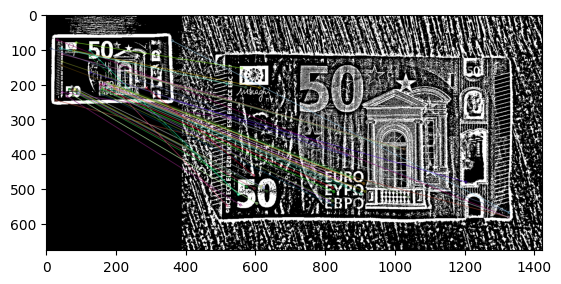

No value found.


In [111]:
noteValue = 0
count5 = 0
count10 = 0
count20 = 0
count50 = 0

if matchedSerial is None:
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    denoise = cv2.fastNlMeansDenoising(gray, None, 5, 7, 21) 
    
    blurred = cv2.GaussianBlur(denoise, (5, 5), 0)
    
    hist = cv2.equalizeHist(blurred)
    
    thresh = cv2.adaptiveThreshold(hist, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 8)

    text = pytesseract.image_to_string(thresh, config="--psm 6")
        
    if '5' in text:
        count5 = text.count("5")
        query = cv2.imread("real5.png")

    if '20' in text:
        count20 = text.count("20")
        query = cv2.imread("real20.png")

    if '10' in text:
        count10 = text.count("10")
        query = cv2.imread("real10.png")
    
    if '50' in text:
        count50 = text.count("50")
        query = cv2.imread("real50.png")
    

    noteValue = count5*5 + count10*10 + count20*20 + count50*50

    train = image
    
    graytrain = cv2.cvtColor(train, cv2.COLOR_BGR2GRAY)
    grayquery = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)

    histtrain = cv2.equalizeHist(graytrain)
    histquery = cv2.equalizeHist(grayquery)

    denoisetrain = cv2.fastNlMeansDenoising(graytrain, None, 3, 7, 21) 

    threshtrain = cv2.adaptiveThreshold(denoisetrain, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 7)
    threshquery = cv2.adaptiveThreshold(histquery, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 7)

    train = threshtrain #SIFT train image
    query = threshquery #SIFT query image

    # Initiate SIFT
    sift = cv2.xfeatures2d.SIFT_create()

    # Find keypoints & descriptors using SIFT
    keypointOne, descOne = sift.detectAndCompute(train, None)
    keypointTwo, descTwo = sift.detectAndCompute(query, None)

    # Initialize BF Matcher
    bfMatch = cv2.BFMatcher()
    matches = bfMatch.knnMatch(descOne, descTwo, k = 2)

    validatedArray = []
    notVal = True
    for i, j in matches:
        if i.distance < 0.75 * j.distance:
            validatedArray.append( [i] )
            arrLength = len (validatedArray)
            percent=(arrLength * 1000) / len (keypointTwo)
            if percent >= 50.00:
                notVal = False
                print('\nValidated!\n')
                break
    if notVal:
        print("\nNot validated!\n")
        noteValue = 0 

    output = cv2.drawMatchesKnn(train, keypointOne, query, keypointTwo, validatedArray, None, flags = 2)
    plt.imshow(output), plt.show()
    if noteValue > 0:
        print("Value of note(s) found: €" + str(noteValue))
    else:
        print("No value found.")
else:  
    if (sum_string(str(serialSum)) == countryCode):
        print("Note is valid!\n")
        print("Country of issue:", countryOfIssue)
        print("")
        print(sum_string(str(serialSum)), "=", countryCode, "( Checksum = Country code:", firstLetter, ")")
    else:
        print("Note is not valid!")
        print(sum_string(str(serialSum)), "≠", countryCode, "( Checksum ≠ Country code:", firstLetter, ")")